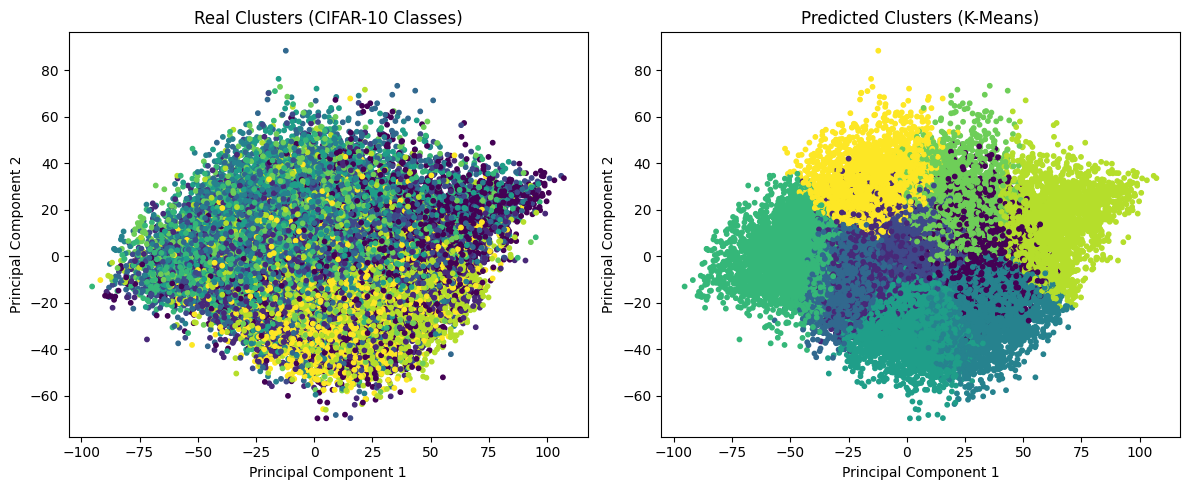

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # For visualization only
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Preprocess images
train_images_flat = train_images.reshape((len(train_images), -1))
test_images_flat = test_images.reshape((len(test_images), -1))

# Standardize data
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

# Apply K-Means clustering to training images
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
train_predictions = kmeans.fit_predict(train_images_scaled)

# Use the trained model to predict clusters for test images
test_predictions = kmeans.predict(test_images_scaled)

# Visualize the first two principal components using PCA for dimensionality reduction
pca = PCA(n_components=2)
train_images_pca = pca.fit_transform(train_images_scaled)

# Plot real clusters (CIFAR-10 classes)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_labels.flatten(), cmap='viridis', s=10)
plt.title('Real Clusters (CIFAR-10 Classes)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(train_images_pca[:, 0], train_images_pca[:, 1], c=train_predictions, cmap='viridis', s=10)
plt.title('Predicted Clusters (K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()
